In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean
import cartopy.crs as ccrs
import wocemaps as wm

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
# this only needs to be created once per Jupyter session
gcs = gcsfs.GCSFileSystem(token='anon')

**Monthly Sea Surface Salinity (sos) Datasets**

In [5]:
sos126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

sos126_zarr = sos126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
sos126_mapper = gcs.get_mapper(sos126_zarr)
# open the dataset using xarray and zarr
sos126 = xr.open_zarr(sos126_mapper, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [6]:
sos585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

sos585_zarr = sos585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
sos585_mapper = gcs.get_mapper(sos585_zarr)
# open the dataset using xarray and zarr
sos585 = xr.open_zarr(sos585_mapper, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Monthly Precipitation (pr) Datasets**

In [7]:
pr126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

pr126_zarr = pr126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
pr126_mapper = gcs.get_mapper(pr126_zarr)
# open the dataset using xarray and zarr
pr126 = xr.open_zarr(pr126_mapper, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [8]:
pr585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

pr585_zarr = pr585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
pr585_mapper = gcs.get_mapper(pr585_zarr)
# open the dataset using xarray and zarr
pr585 = xr.open_zarr(pr585_mapper, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Monthly Water Vapor Content (prw) Datasets**

In [9]:
prw126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

prw126_zarr = prw126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
prw126_mapper = gcs.get_mapper(prw126_zarr)
# open the dataset using xarray and zarr
prw126 = xr.open_zarr(prw126_mapper, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [10]:
prw585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

prw585_zarr = prw585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
prw585_mapper = gcs.get_mapper(prw585_zarr)
# open the dataset using xarray and zarr
prw585 = xr.open_zarr(prw585_mapper, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Monthly “evaporation including sublimination and transpiration” (evspsbl) Datasets**

In [11]:
evs126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

evs126_zarr = evs126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
evs126_mapper = gcs.get_mapper(evs126_zarr)
# open the dataset using xarray and zarr
evs126 = xr.open_zarr(evs126_mapper, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [12]:
evs585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

evs585_zarr = evs585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
evs585_mapper = gcs.get_mapper(evs585_zarr)
# open the dataset using xarray and zarr
evs585 = xr.open_zarr(evs126_mapper, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Monthly Snow Fall Flux (prsn) Datasets**

In [13]:
prs126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

prs126_zarr = prs126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
prs126_mapper = gcs.get_mapper(prs126_zarr)
# open the dataset using xarray and zarr
prs126 = xr.open_zarr(prs126_mapper, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [14]:
prs585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

prs585_zarr = prs585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
prs585_mapper = gcs.get_mapper(prs585_zarr)
# open the dataset using xarray and zarr
prs585 = xr.open_zarr(prs585_mapper, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Variable Explanations**

*Precipitation*: The volume of precipitation (in kg) per m² per second.

*Snowfall Flux*: The measurement of how much snow (measured in kg) passes through a unit area (in this case, m²) within a given time (in this case, seconds).

**pr126 Graphs**

In [16]:
first20yr_pr126 = pr126.sel(time = slice('2015-01-16', '2035-01-16'))
firstavg_pr126 = first20yr_pr126.mean('time')

last20yr_pr126 = pr126.sel(time = slice('2080-12-16', '2100-12-16'))
lastavg_pr126 = last20yr_pr126.mean('time')

pr126_anomaly = lastavg_pr126 - firstavg_pr126

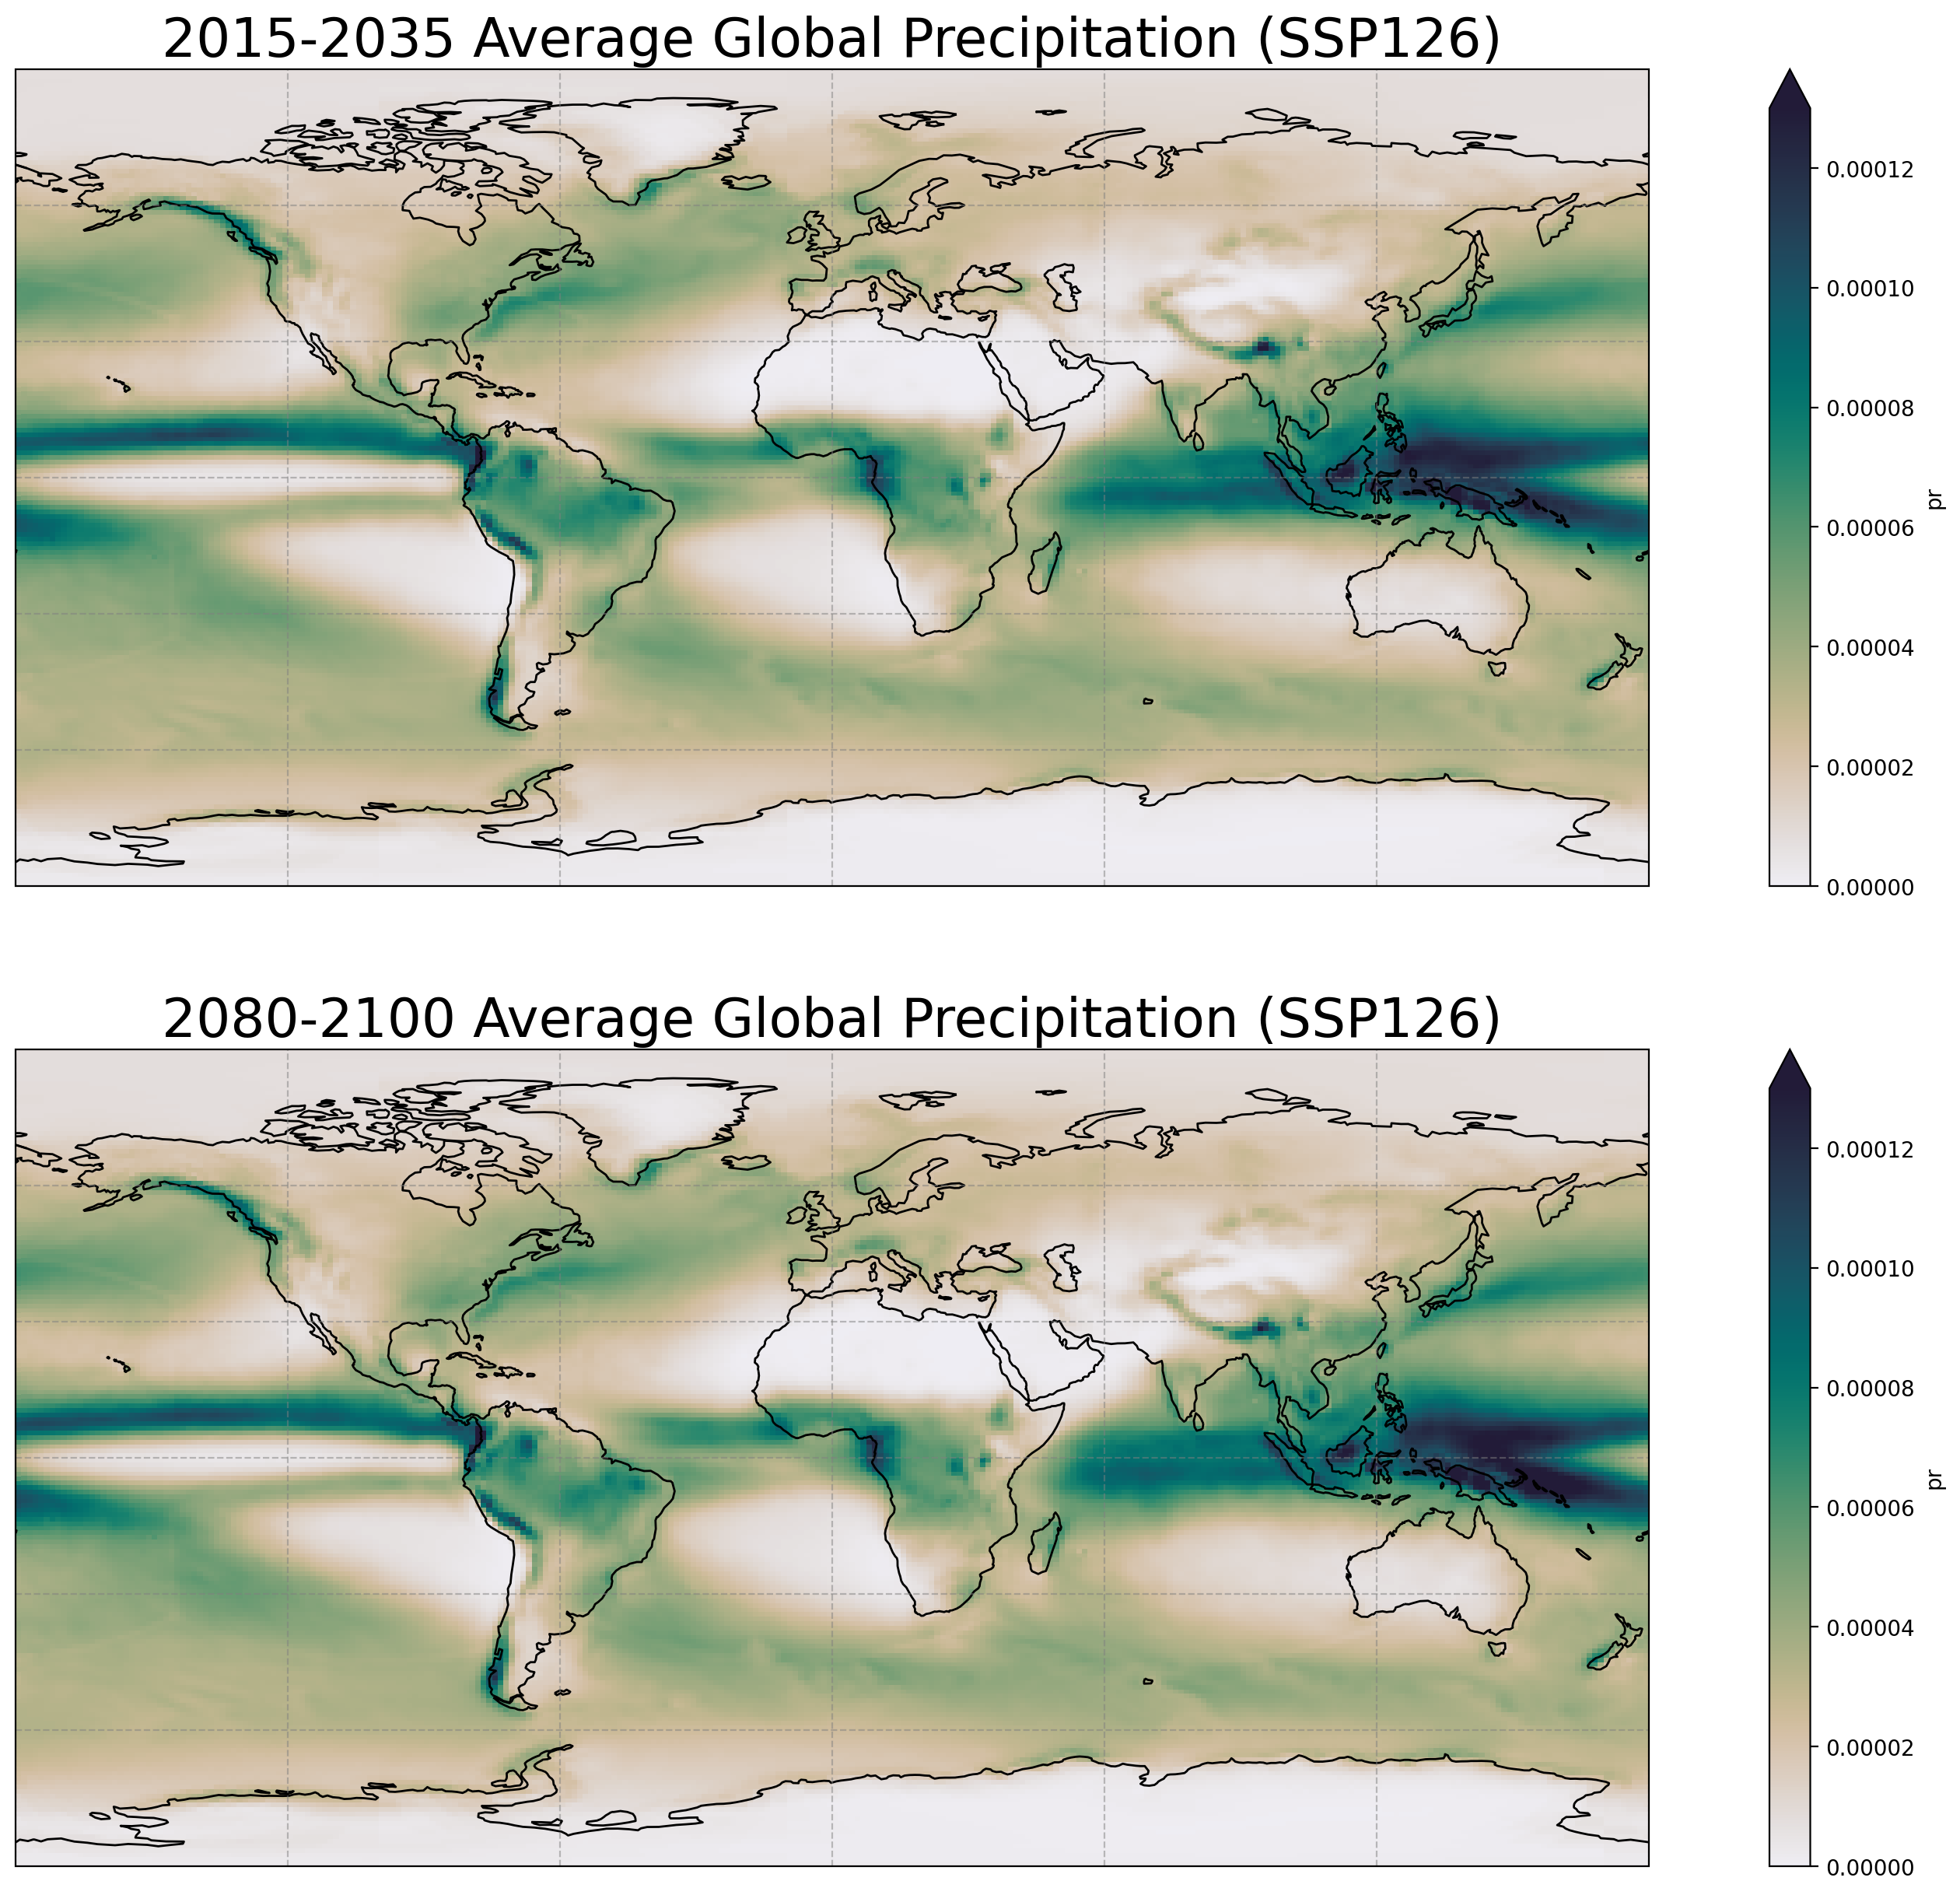

In [87]:
# Establishing figure parameters and ensuring coastlines can be added atop the maps
subplot_kws=dict(projection=ccrs.PlateCarree())
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15), subplot_kw = subplot_kws)

# Plotting each dataset on their perspective axis
firstavg_pr126.plot(ax = ax1, cmap = cmocean.cm.rain, vmin = 0, vmax = 0.00013, transform = ccrs.PlateCarree())
lastavg_pr126.plot(ax = ax2, cmap = cmocean.cm.rain, vmin = 0, vmax = 0.00013, transform = ccrs.PlateCarree())

#Setting figure titles
ax1.set_title('2015-2035 Average Global Precipitation (SSP126)', fontsize = 25)
ax2.set_title('2080-2100 Average Global Precipitation (SSP126)', fontsize = 25)

# Adding coastlines for better visualization
ax1.coastlines()
ax2.coastlines()

# Adding gridlines
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

**pr585 Graphs**

In [18]:
first20yr_pr585 = pr585.sel(time = slice('2015-01-16', '2035-01-16'))
firstavg_pr585 = first20yr_pr585.mean('time')

last20yr_pr585 = pr585.sel(time = slice('2080-12-16', '2100-12-16'))
lastavg_pr585 = last20yr_pr585.mean('time')

pr585_anomaly = lastavg_pr585 - firstavg_pr585

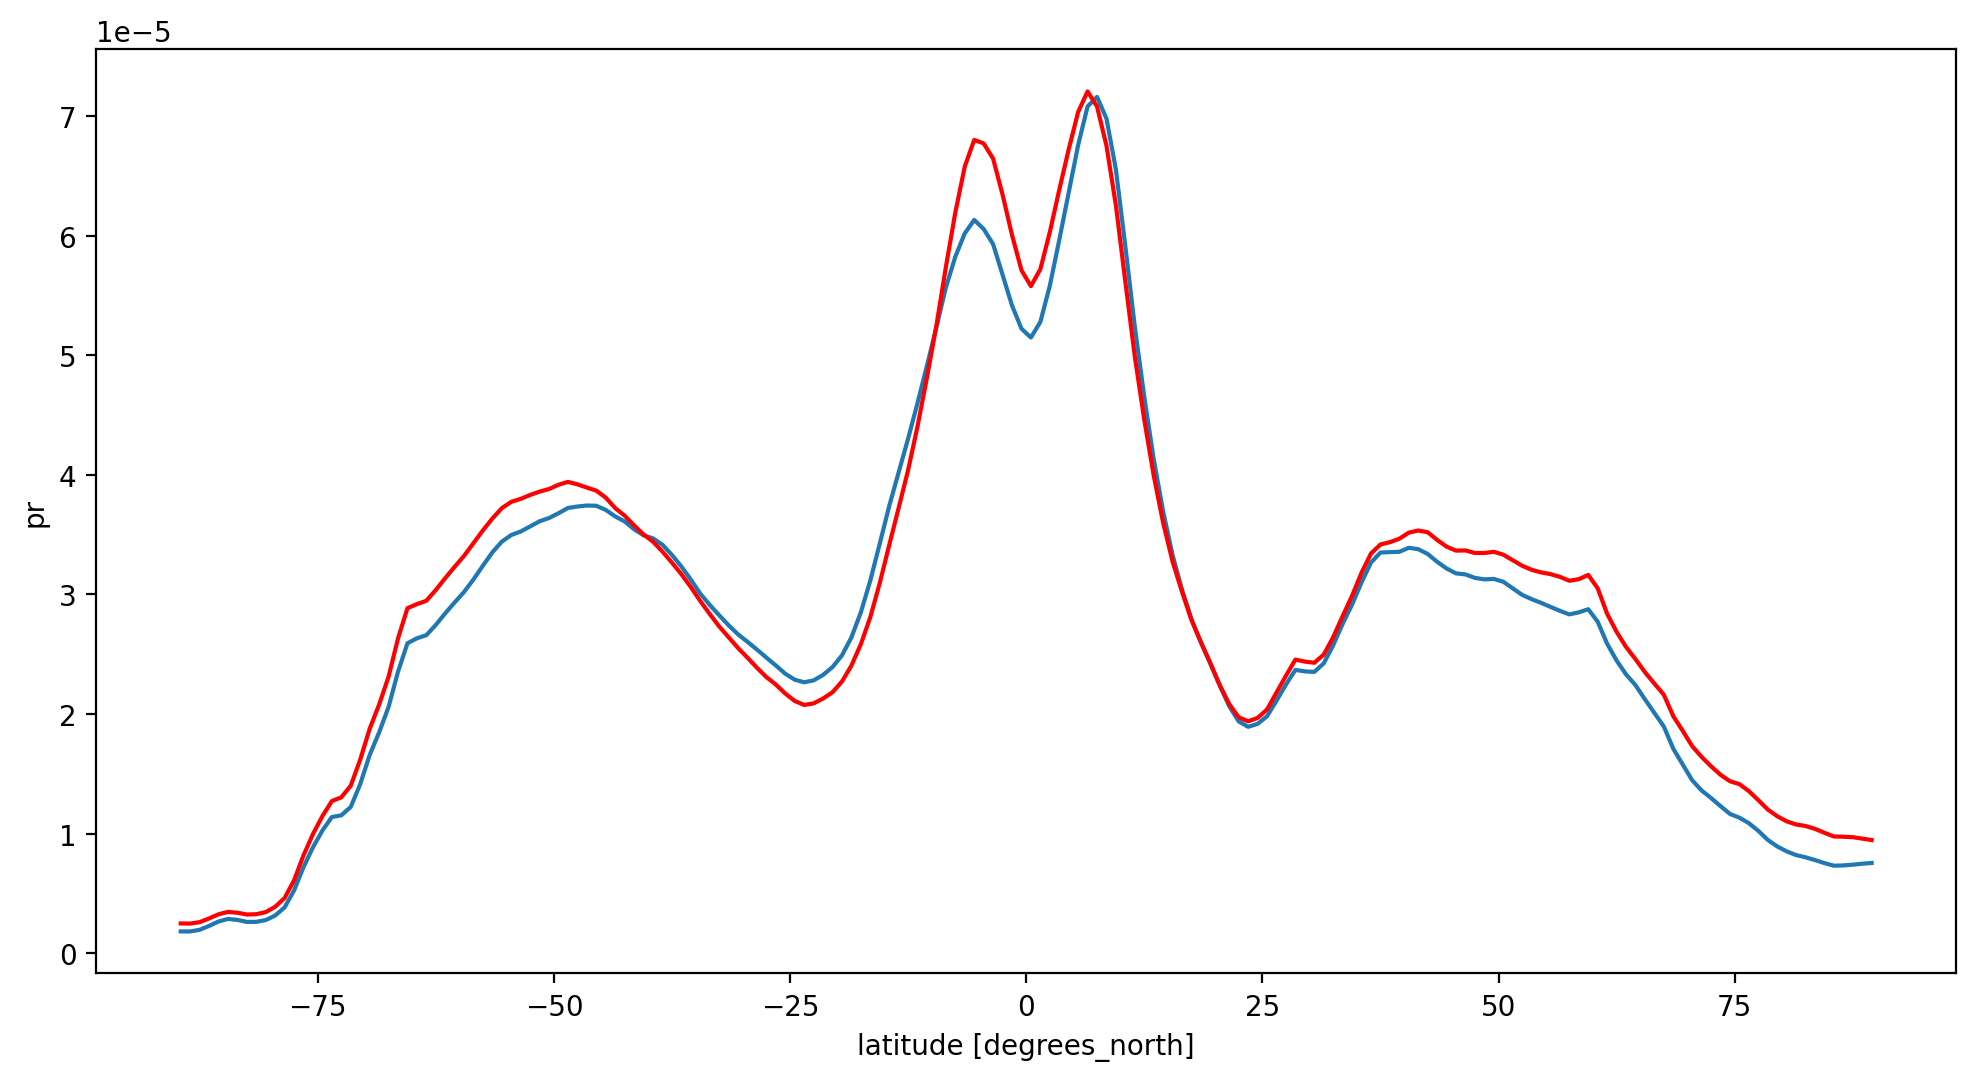

In [100]:
firstavg_pr585.mean(dim = 'longitude').plot()
lastavg_pr585.mean(dim = 'longitude').plot(color = 'red')

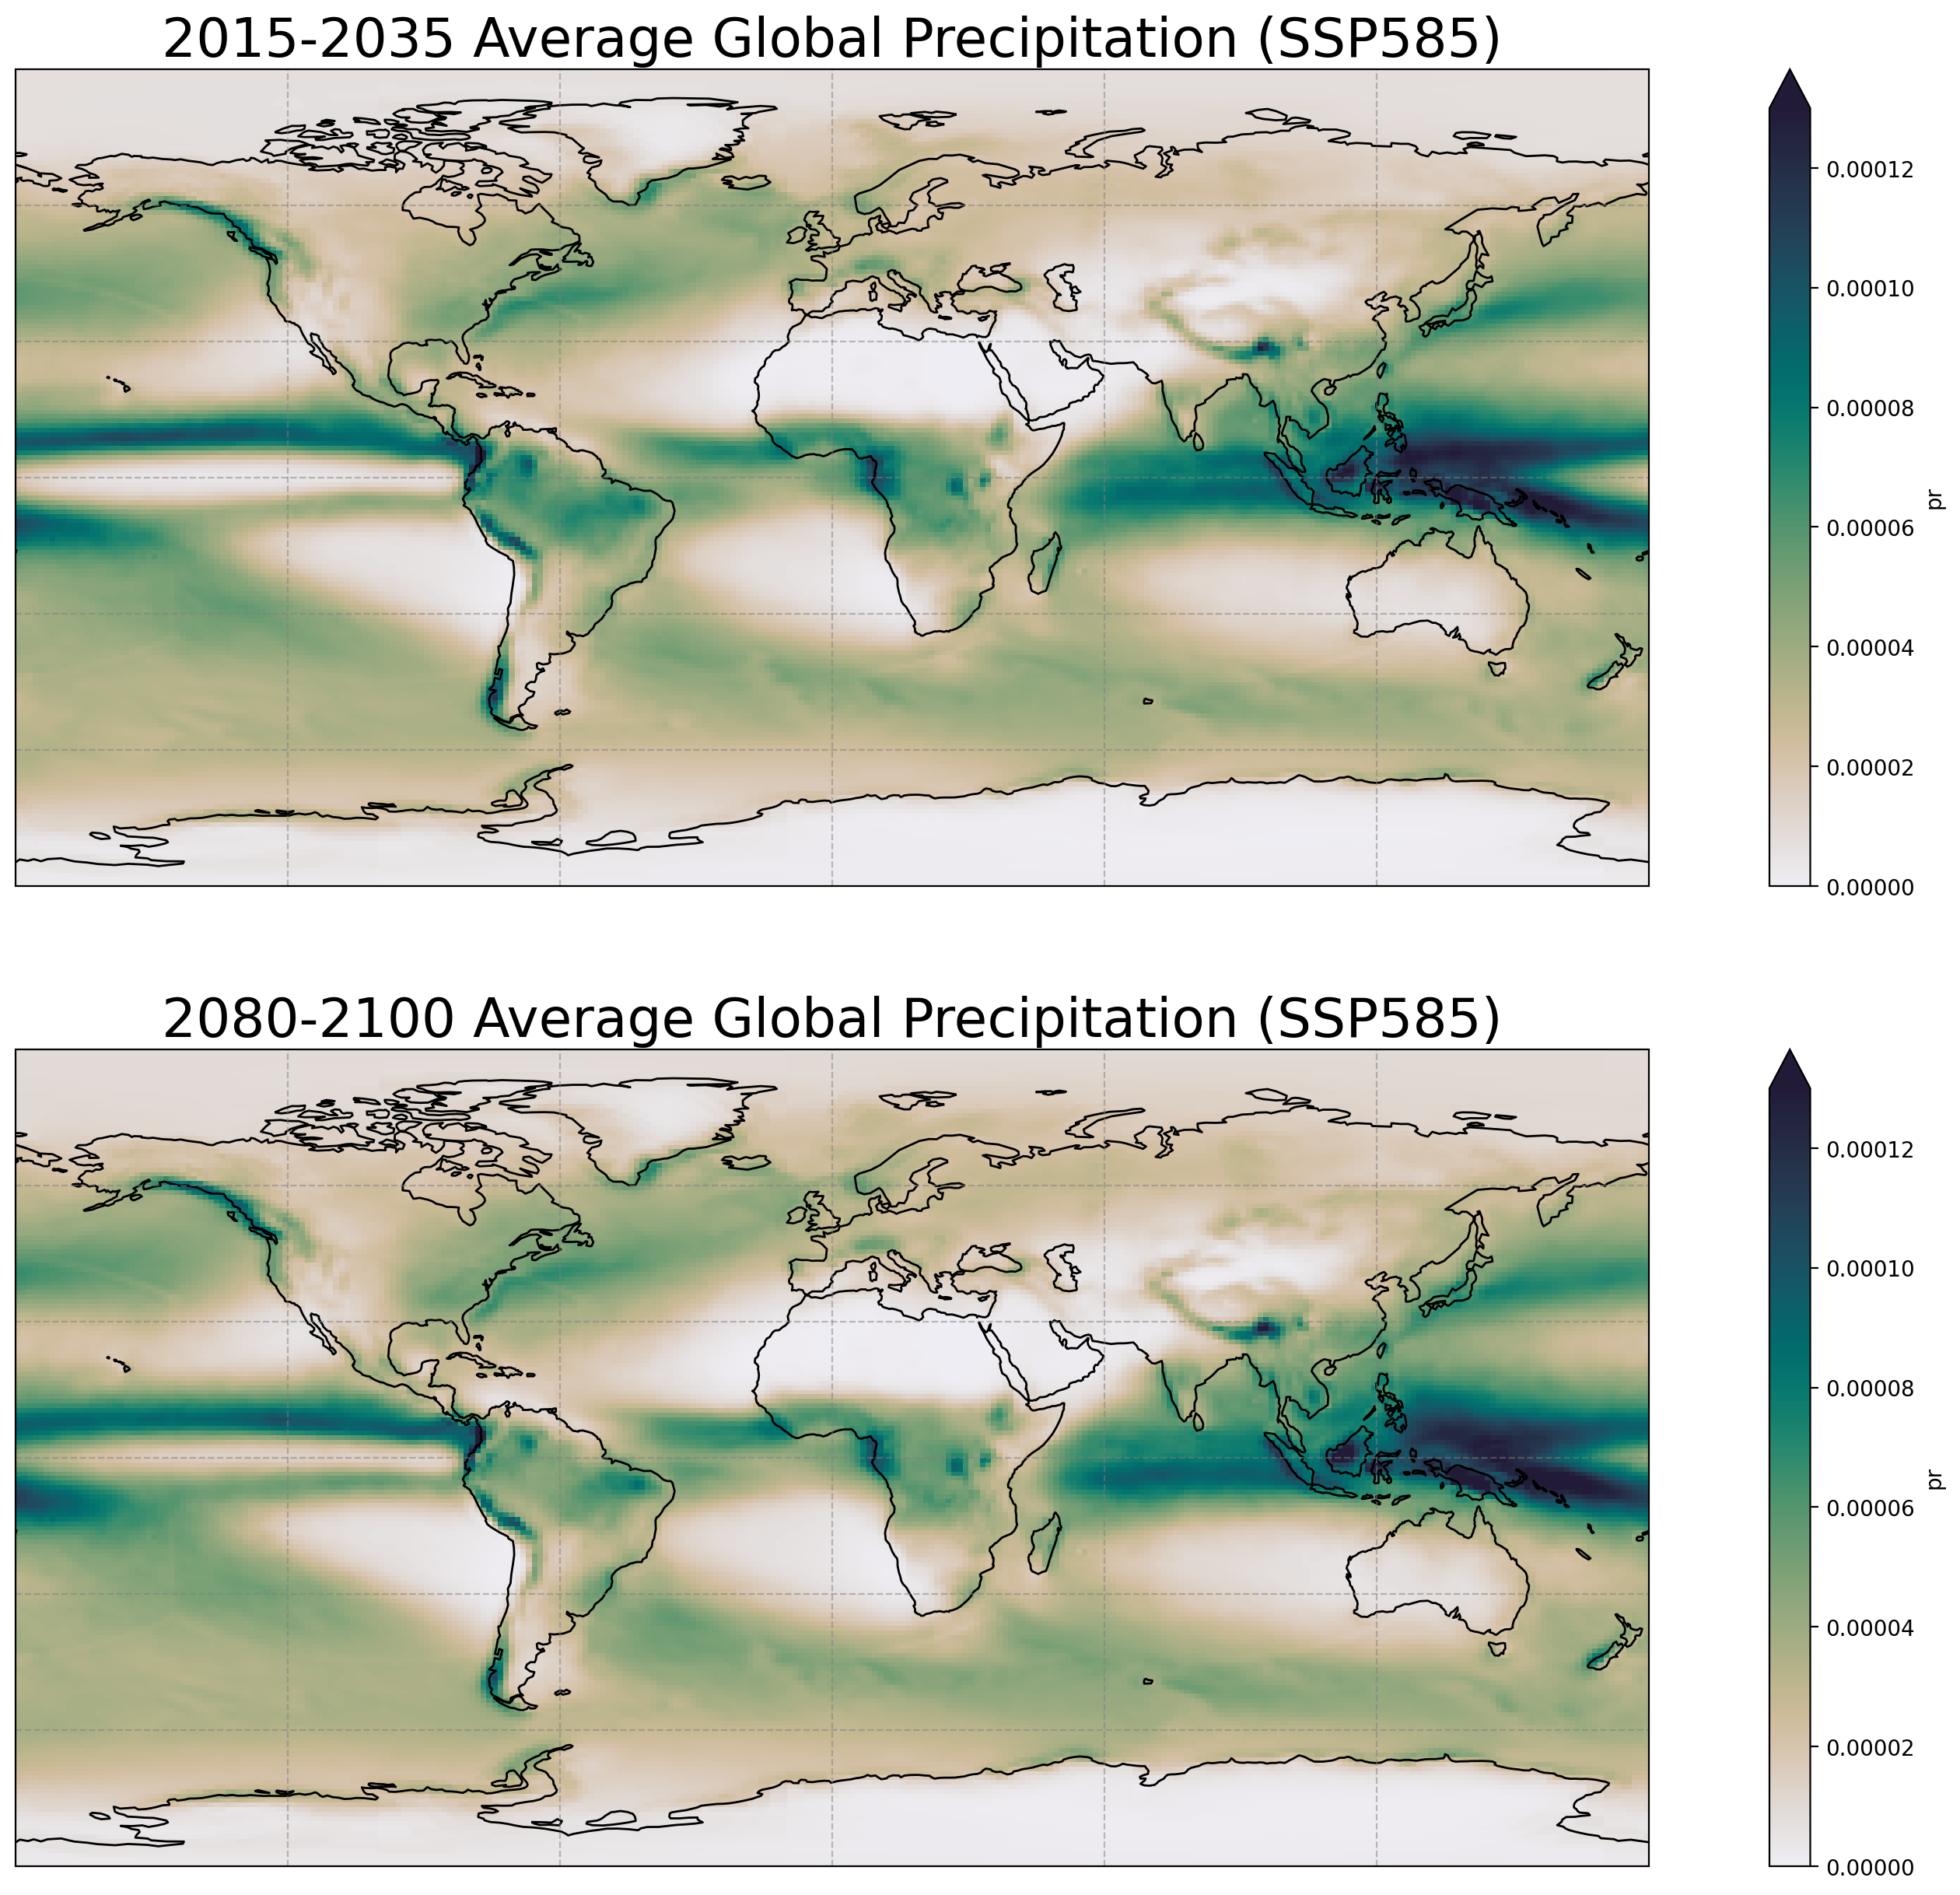

In [89]:
# Establishing figure parameters and ensuring coastlines can be added atop the maps
subplot_kws=dict(projection=ccrs.PlateCarree())
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15), subplot_kw = subplot_kws)

# Plotting each dataset on their perspective axis
firstavg_pr585.plot(ax = ax1, cmap = cmocean.cm.rain, vmin = 0, vmax = 0.00013, transform = ccrs.PlateCarree())
lastavg_pr585.plot(ax = ax2, cmap = cmocean.cm.rain, vmin = 0, vmax = 0.00013, transform = ccrs.PlateCarree())

#Setting figure titles
ax1.set_title('2015-2035 Average Global Precipitation (SSP585)', fontsize = 25)
ax2.set_title('2080-2100 Average Global Precipitation (SSP585)', fontsize = 25)

# Adding coastlines for better visualization
ax1.coastlines()
ax2.coastlines()

# Adding gridlines
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

**pr Anomalies**

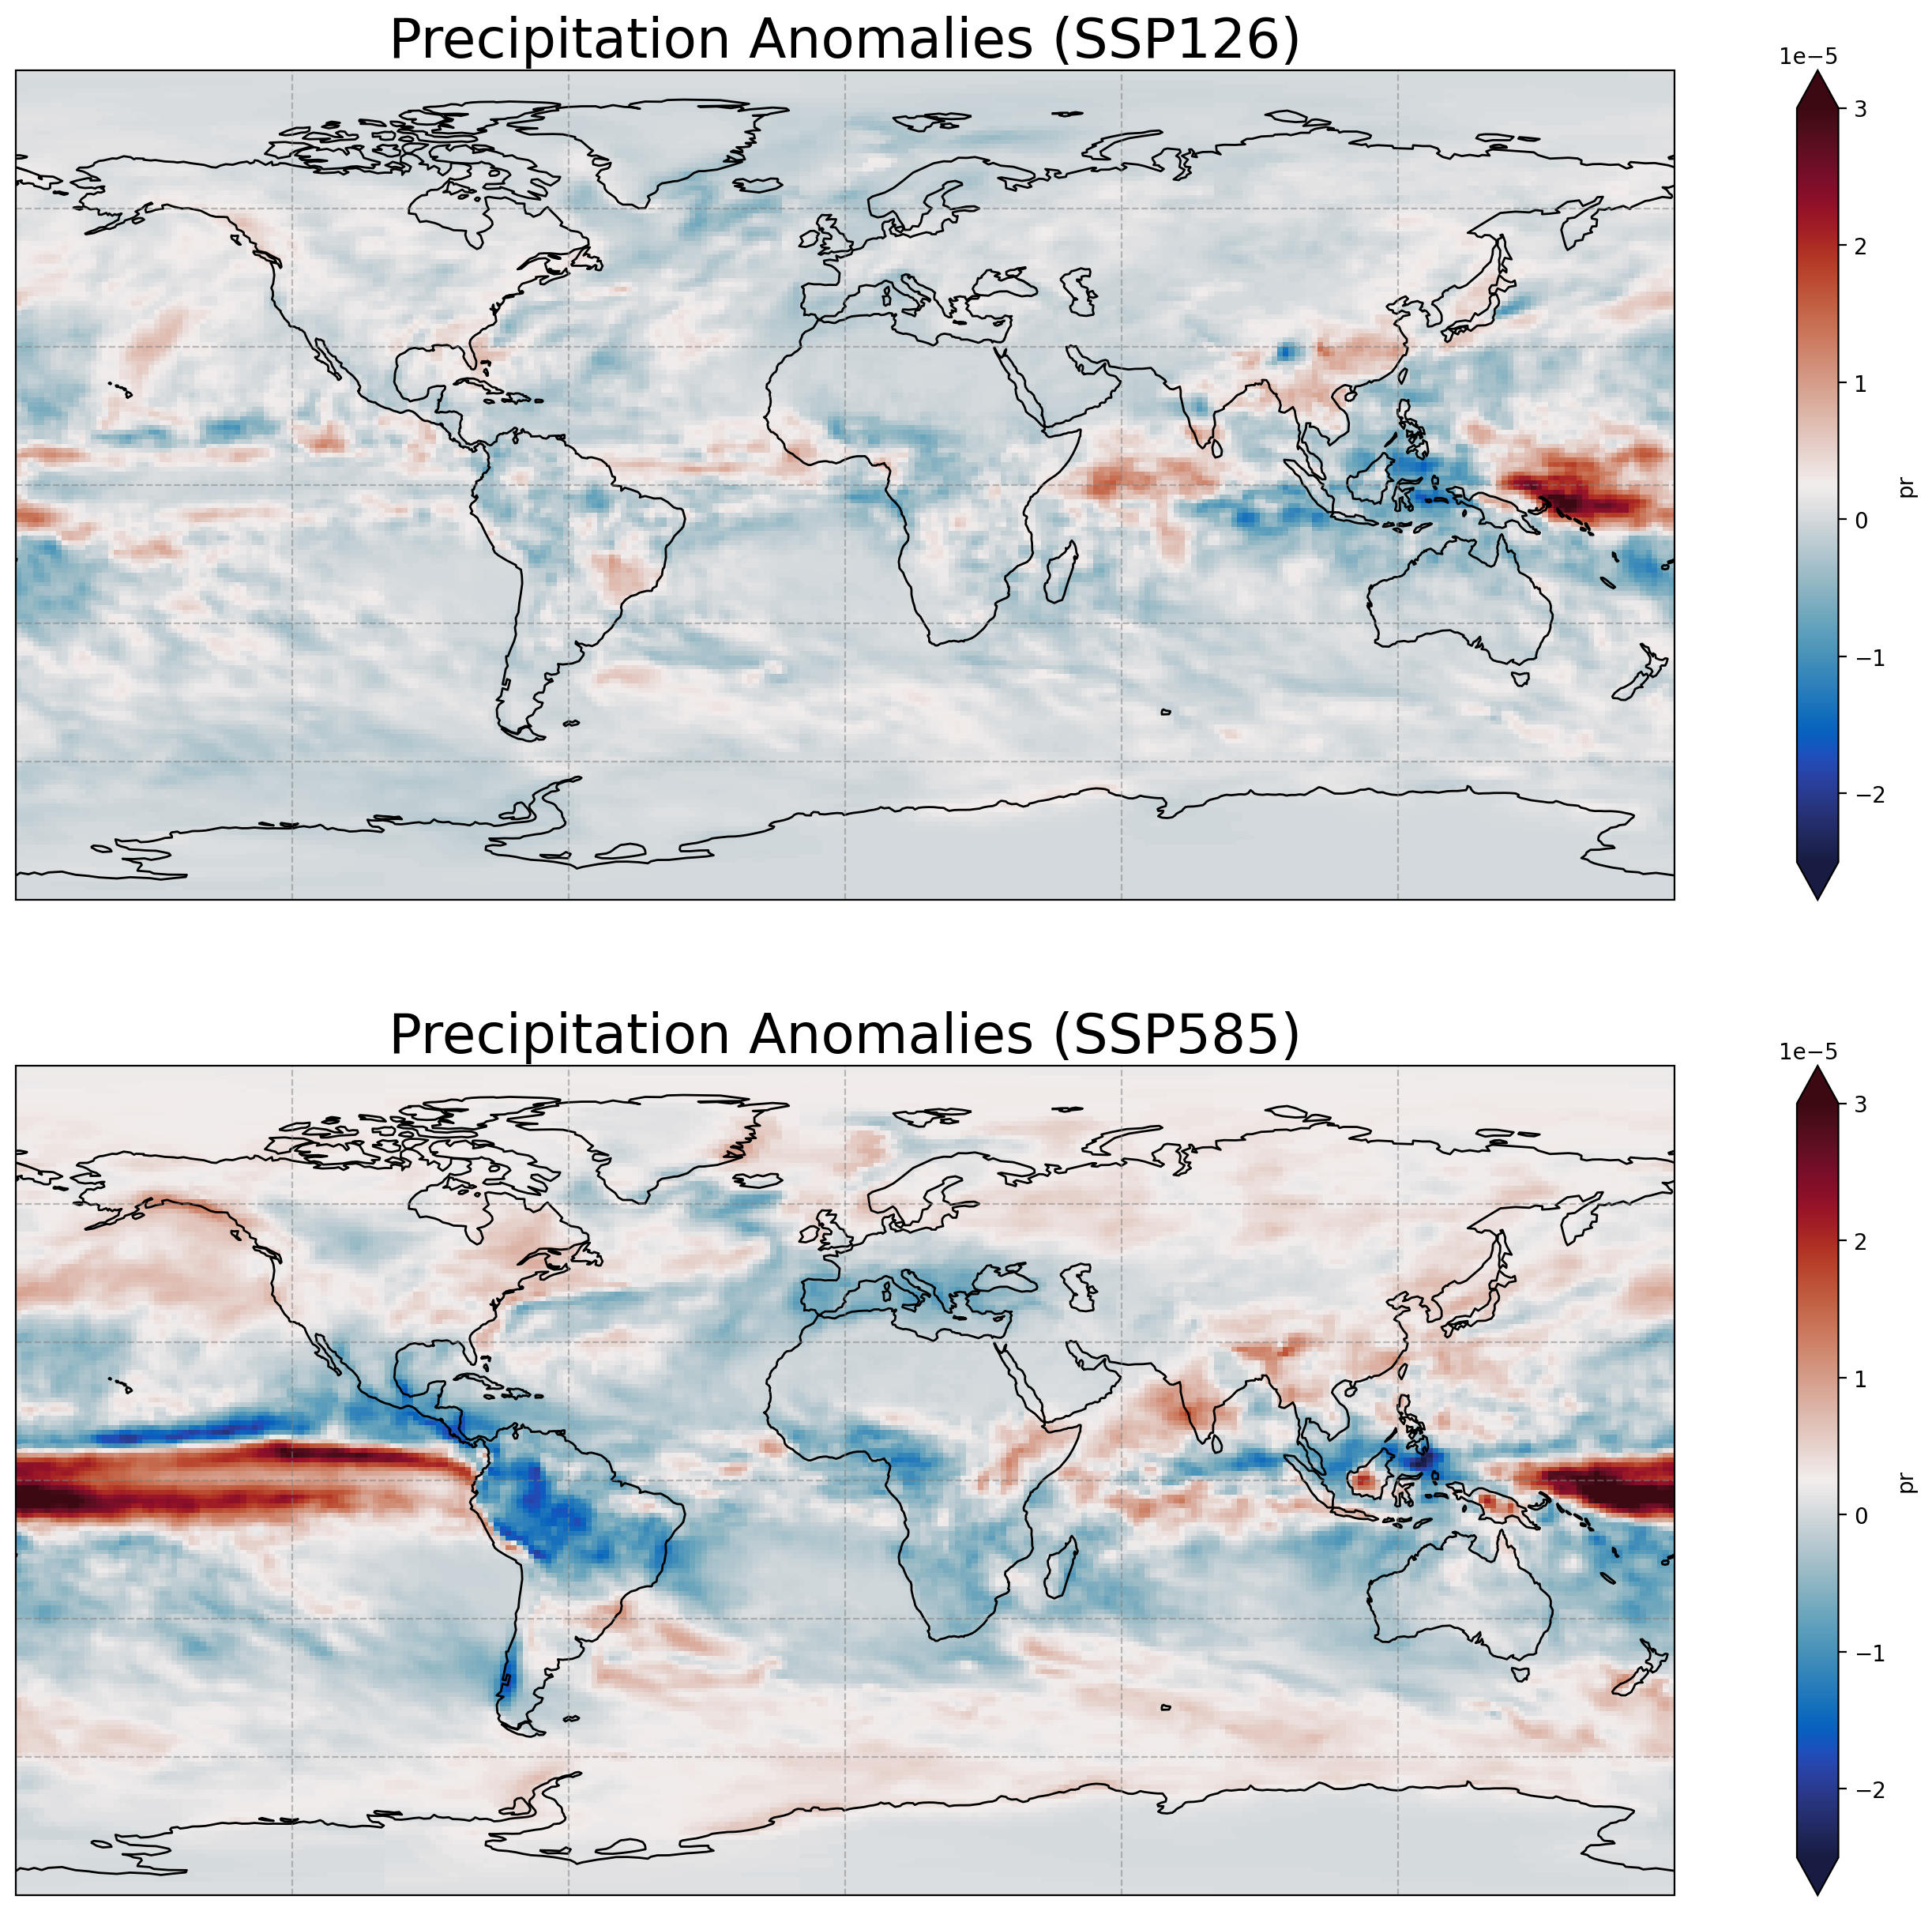

In [95]:
# Establishing figure parameters and ensuring coastlines can be added atop the maps
subplot_kws=dict(projection=ccrs.PlateCarree())
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15), subplot_kw = subplot_kws)

# Plotting each dataset on their perspective axis
pr126_anomaly.plot(ax = ax1, cmap = cmocean.cm.balance, vmin = -0.000025, vmax = 0.00003, transform = ccrs.PlateCarree(), extend = 'both')
pr585_anomaly.plot(ax = ax2, cmap = cmocean.cm.balance, vmin = -0.000025, vmax = 0.00003, transform = ccrs.PlateCarree(), extend = 'both')

#Setting figure titles
ax1.set_title('Precipitation Anomalies (SSP126)', fontsize = 25)
ax2.set_title('Precipitation Anomalies (SSP585)', fontsize = 25)

# Adding coastlines for better visualization
ax1.coastlines()
ax2.coastlines()

# Adding gridlines
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

In [123]:
# Code from Dr. Beadling:

# The following function is used to create weights for the Earths grid space.
import warnings 

def standard_grid_cell_area(latitude, longitude, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = latitude[1] - latitude[0]
    dLon = longitude[1] - longitude[0]
    area = np.empty((len(latitude), len(longitude)))
    for j in range(0, len(latitude)):
        for i in range(0, len(longitude)):
            lon1 = longitude[i] + dLon / 2
            lon0 = longitude[i] - dLon / 2
            lat1 = latitude[j] + dLat / 2
            lat0 = latitude[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

lat_sst = pr126.coords['latitude'].values #1-D numpy array of model's latitude values
lon_sst = pr126.coords['longitude'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_sst,lon_sst)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_xarray = xr.DataArray(areacell,dims=({'latitude':180, 'longitude':360}),\
                                                coords=(pr126.coords['latitude'],\
                                                        pr126.coords['longitude']))

In [124]:
weighted_pr126 = pr126*areacell_xarray
weighted_pr585 = pr585*areacell_xarray

In [125]:
mean_pr126 = weighted_pr126.sum(dim = ['latitude', 'longitude']).groupby('time.year').mean(dim = 'time')

mean_pr585 = weighted_pr585.sum(dim = ['latitude', 'longitude']).groupby('time.year').mean(dim = 'time')

Text(0.5, 0, 'Year')

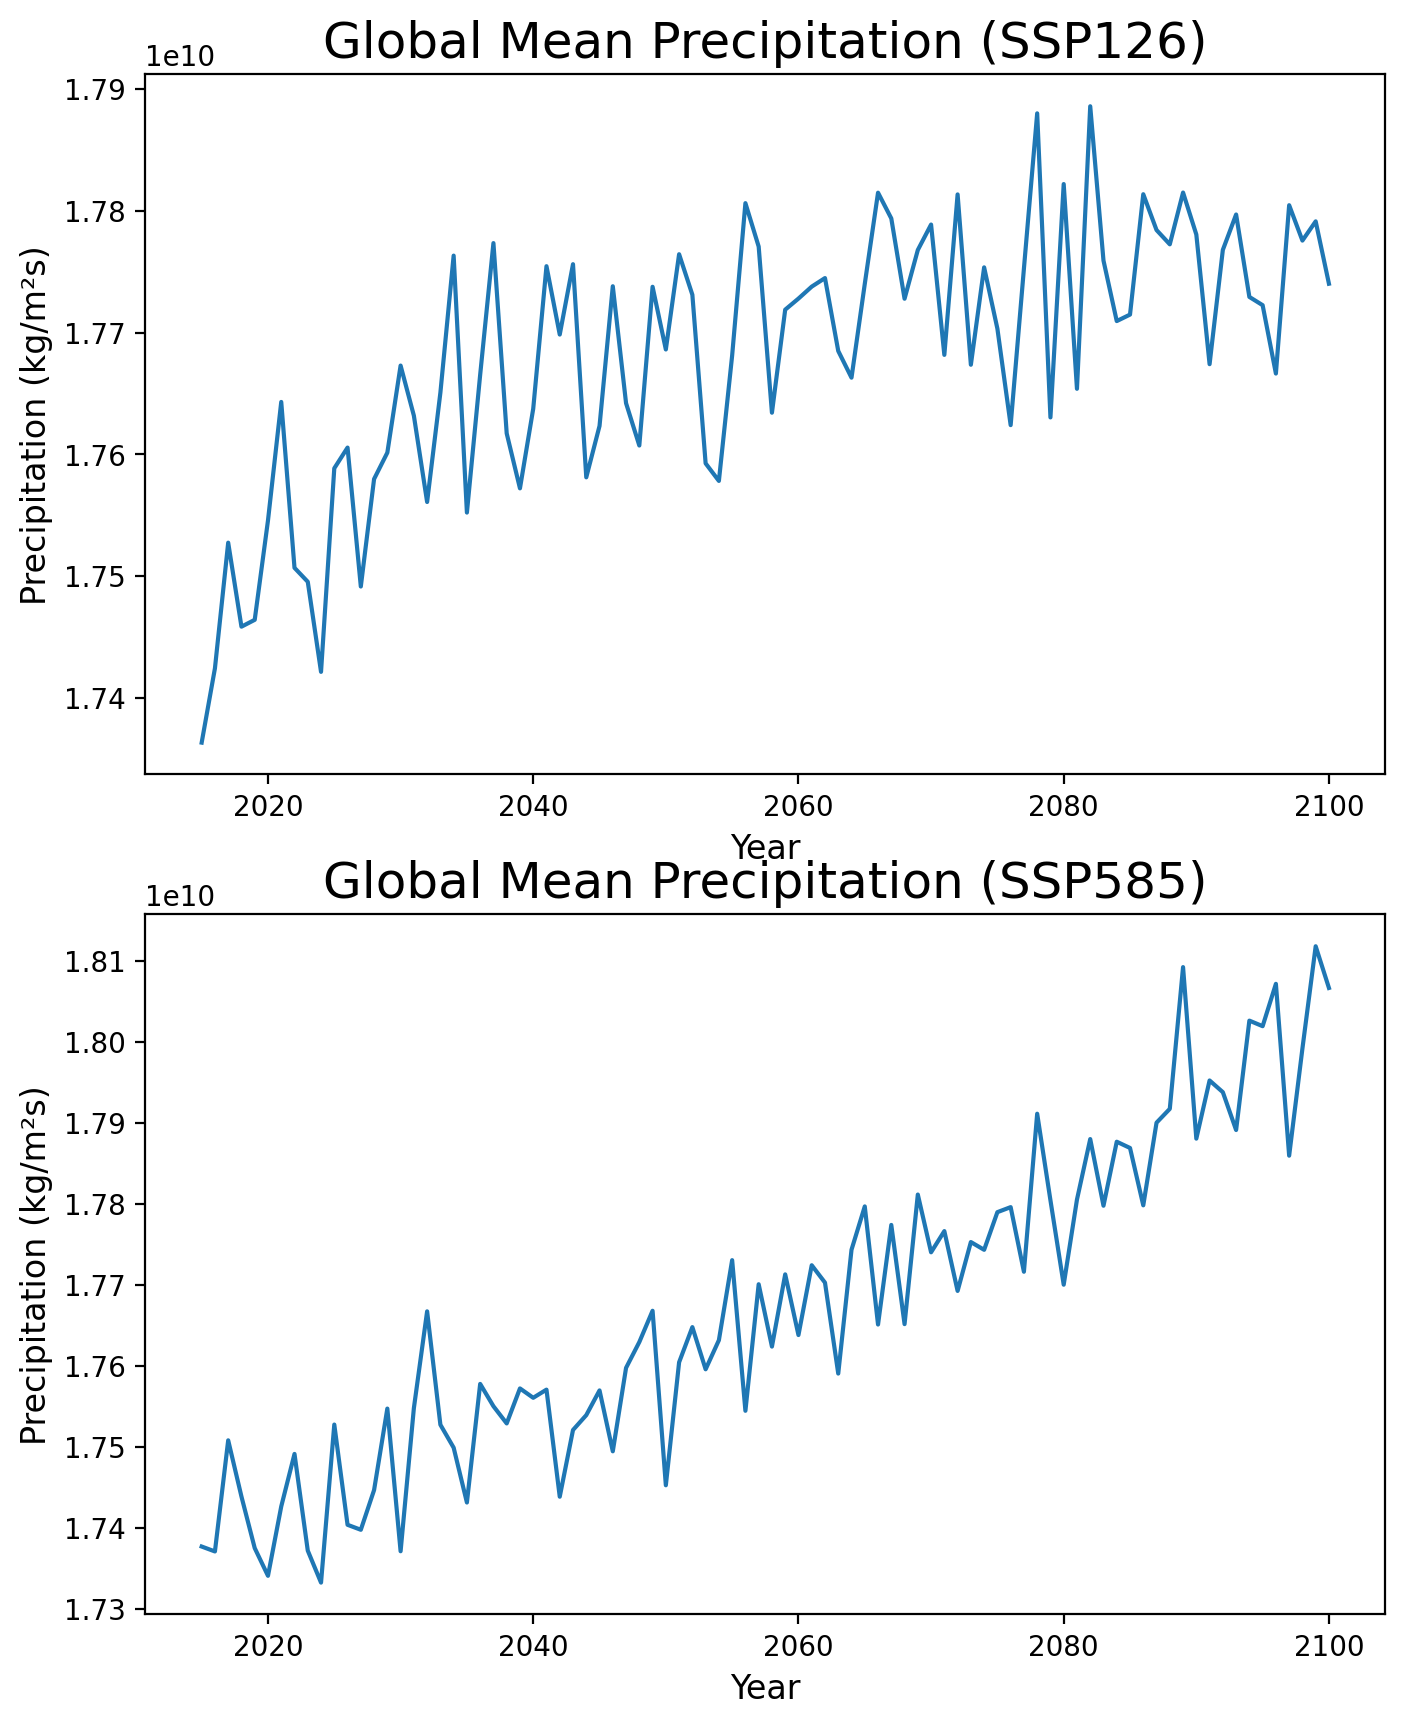

In [132]:
# Establishing figure parameters
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 10))

# Assigning each dataset to the appropriate axis
mean_pr126.plot(ax = ax1)
mean_pr585.plot(ax = ax2)

# Adding figure titles
ax1.set_title('Global Mean Precipitation (SSP126)', fontsize = 18)
ax2.set_title('Global Mean Precipitation (SSP585)', fontsize = 18)

# Adding axis titles
ax1.set_ylabel('Precipitation (kg/m²s)', fontsize = 12)
ax2.set_ylabel('Precipitation (kg/m²s)', fontsize = 12)

ax1.set_xlabel('Year', fontsize = 12)
ax2.set_xlabel('Year', fontsize = 12)

**prs126 Graphs**

In [21]:
first20yr_prs126 = prs126.sel(time = slice('2015-01-16', '2035-01-16'))
firstavg_prs126 = first20yr_prs126.mean('time')

last20yr_prs126 = prs126.sel(time = slice('2080-12-16', '2100-12-16'))
lastavg_prs126 = last20yr_prs126.mean('time')

prs126_anomaly = lastavg_prs126 - firstavg_prs126

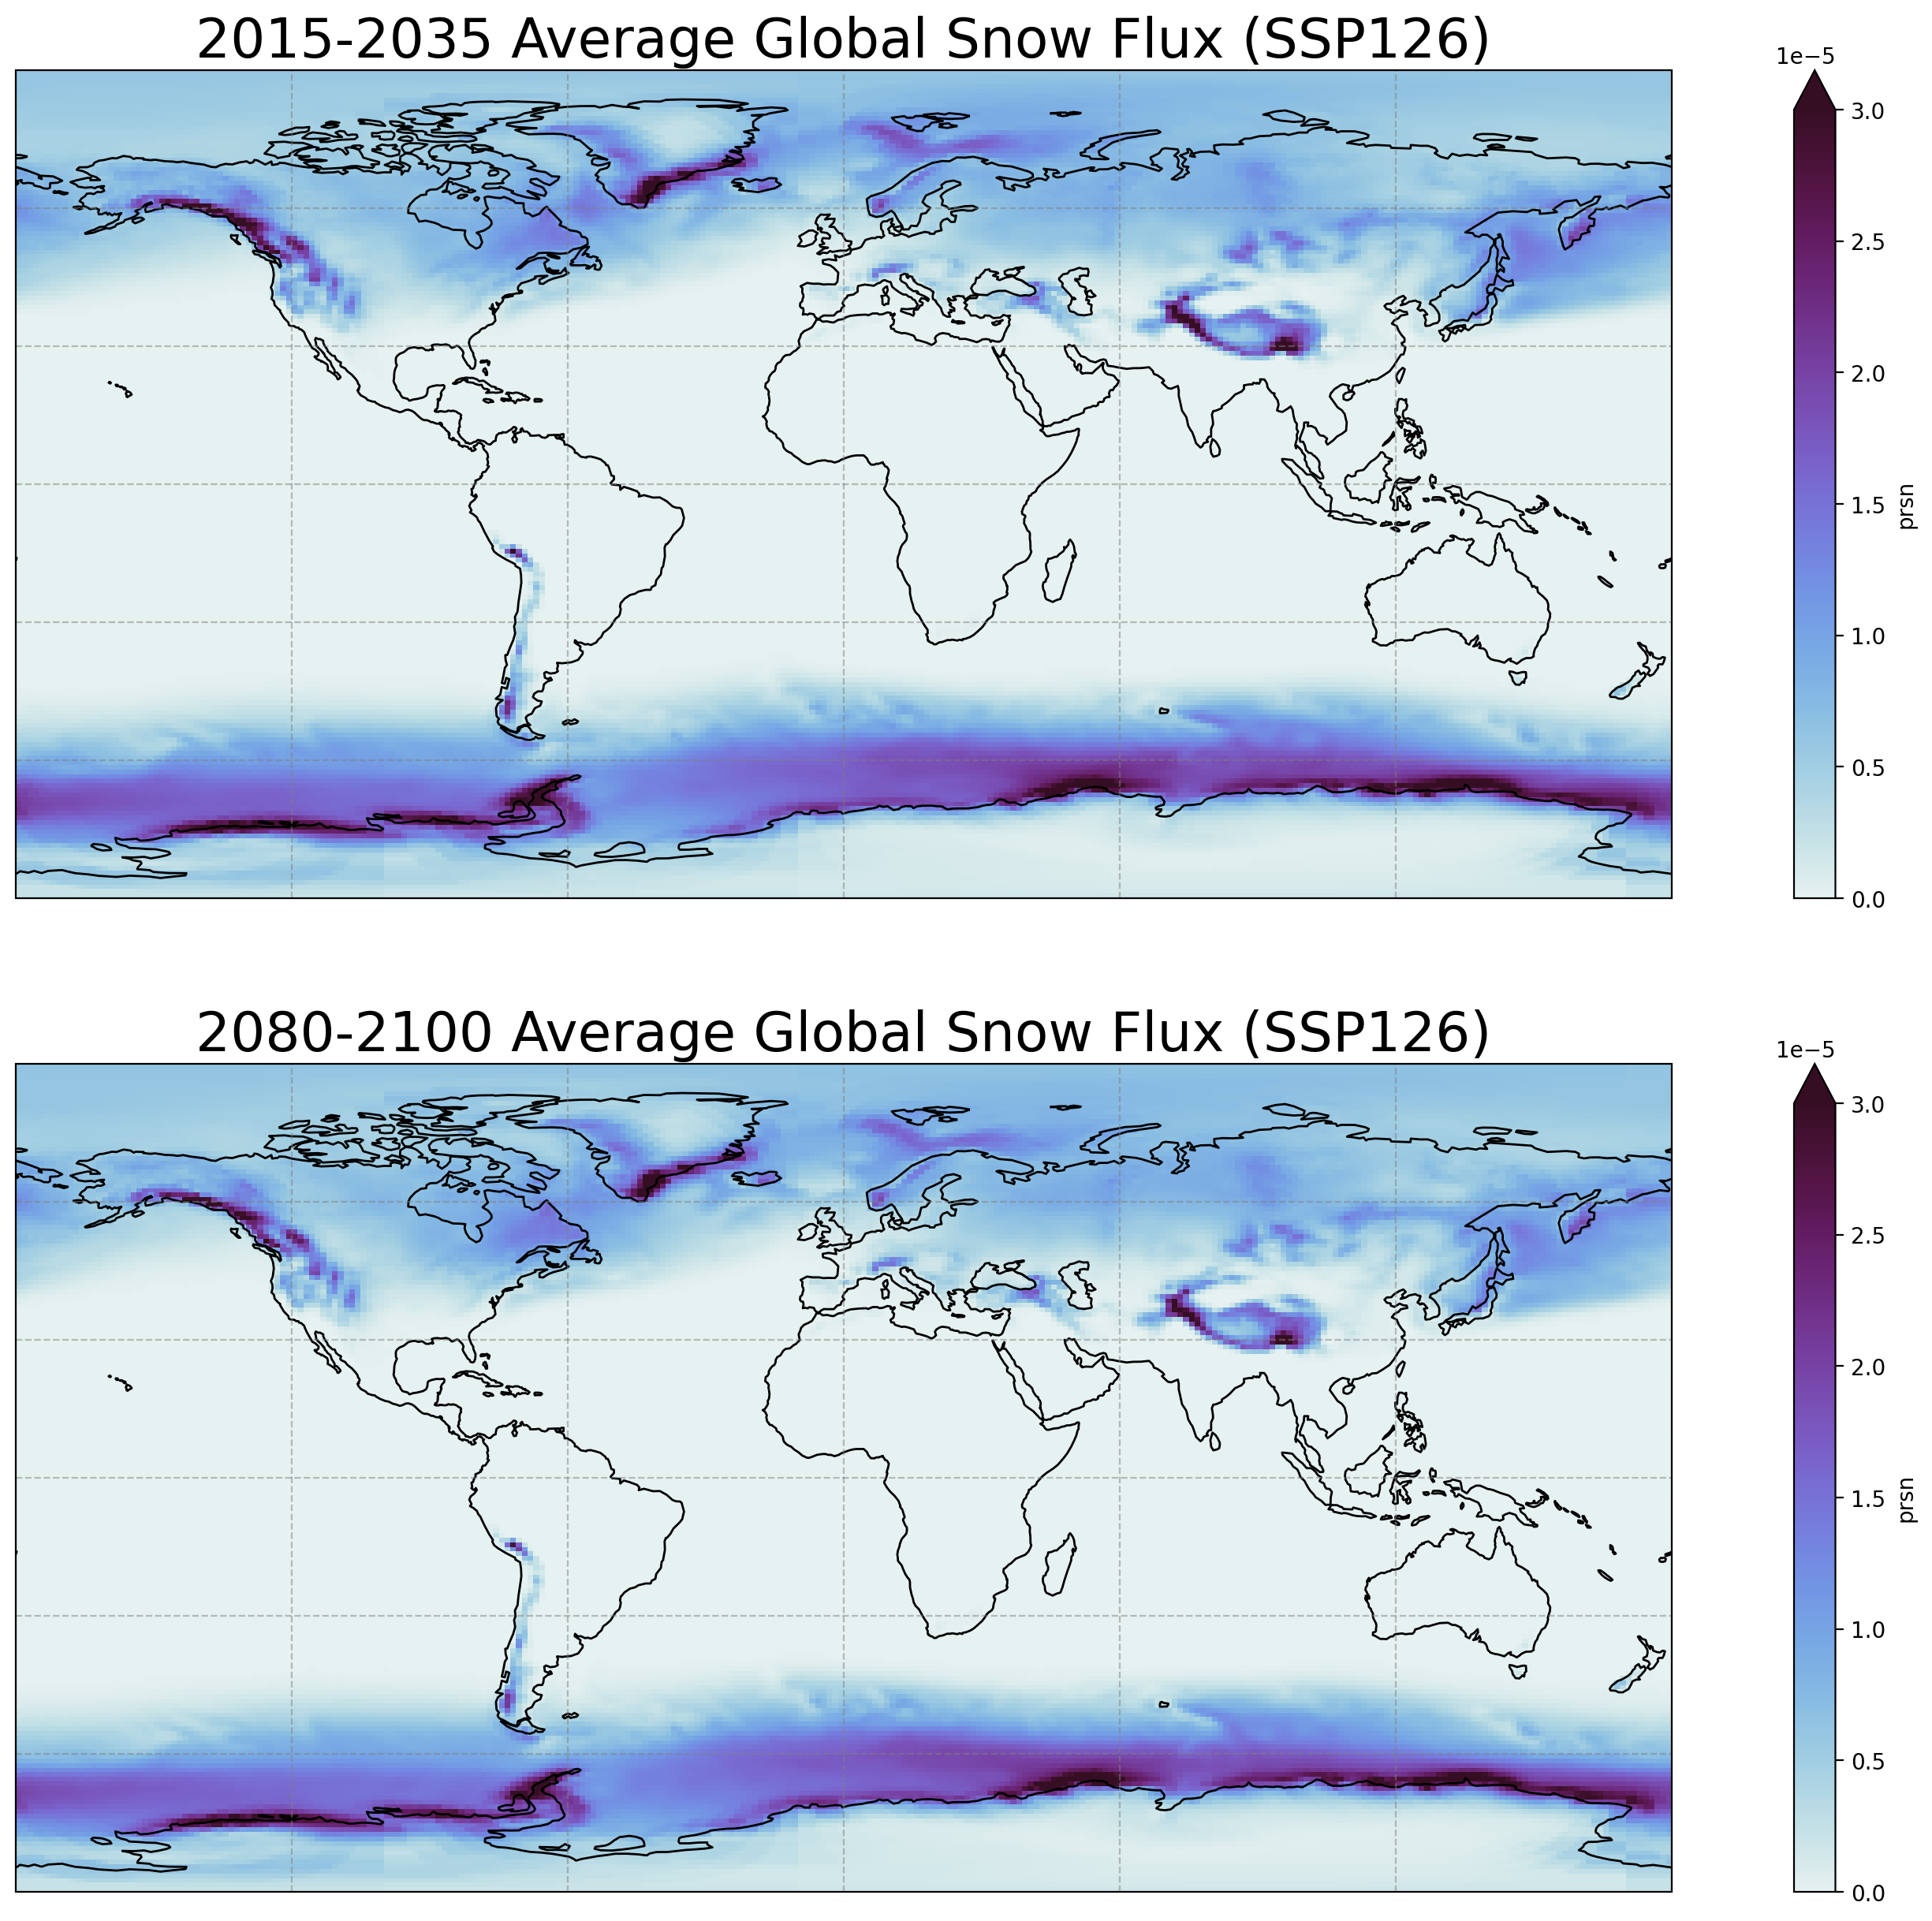

In [91]:
# Establishing figure parameters and ensuring coastlines can be added atop the maps
subplot_kws=dict(projection=ccrs.PlateCarree())
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15), subplot_kw = subplot_kws)

# Plotting each dataset on their perspective axis
firstavg_prs126.plot(ax = ax1, cmap = cmocean.cm.dense, vmin = 0, vmax = 0.00003, transform = ccrs.PlateCarree())
lastavg_prs126.plot(ax = ax2, cmap = cmocean.cm.dense, vmin = 0, vmax = 0.00003, transform = ccrs.PlateCarree())

#Setting figure titles
ax1.set_title('2015-2035 Average Global Snow Flux (SSP126)', fontsize = 25)
ax2.set_title('2080-2100 Average Global Snow Flux (SSP126)', fontsize = 25)

# Adding coastlines for better visualization
ax1.coastlines()
ax2.coastlines()

# Adding gridlines
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

**prs585 Graphs**

In [23]:
first20yr_prs585 = prs585.sel(time = slice('2015-01-16', '2035-01-16'))
firstavg_prs585 = first20yr_prs585.mean('time')

last20yr_prs585 = prs585.sel(time = slice('2080-12-16', '2100-12-16'))
lastavg_prs585 = last20yr_prs585.mean('time')

prs585_anomaly = lastavg_prs585 - firstavg_prs585

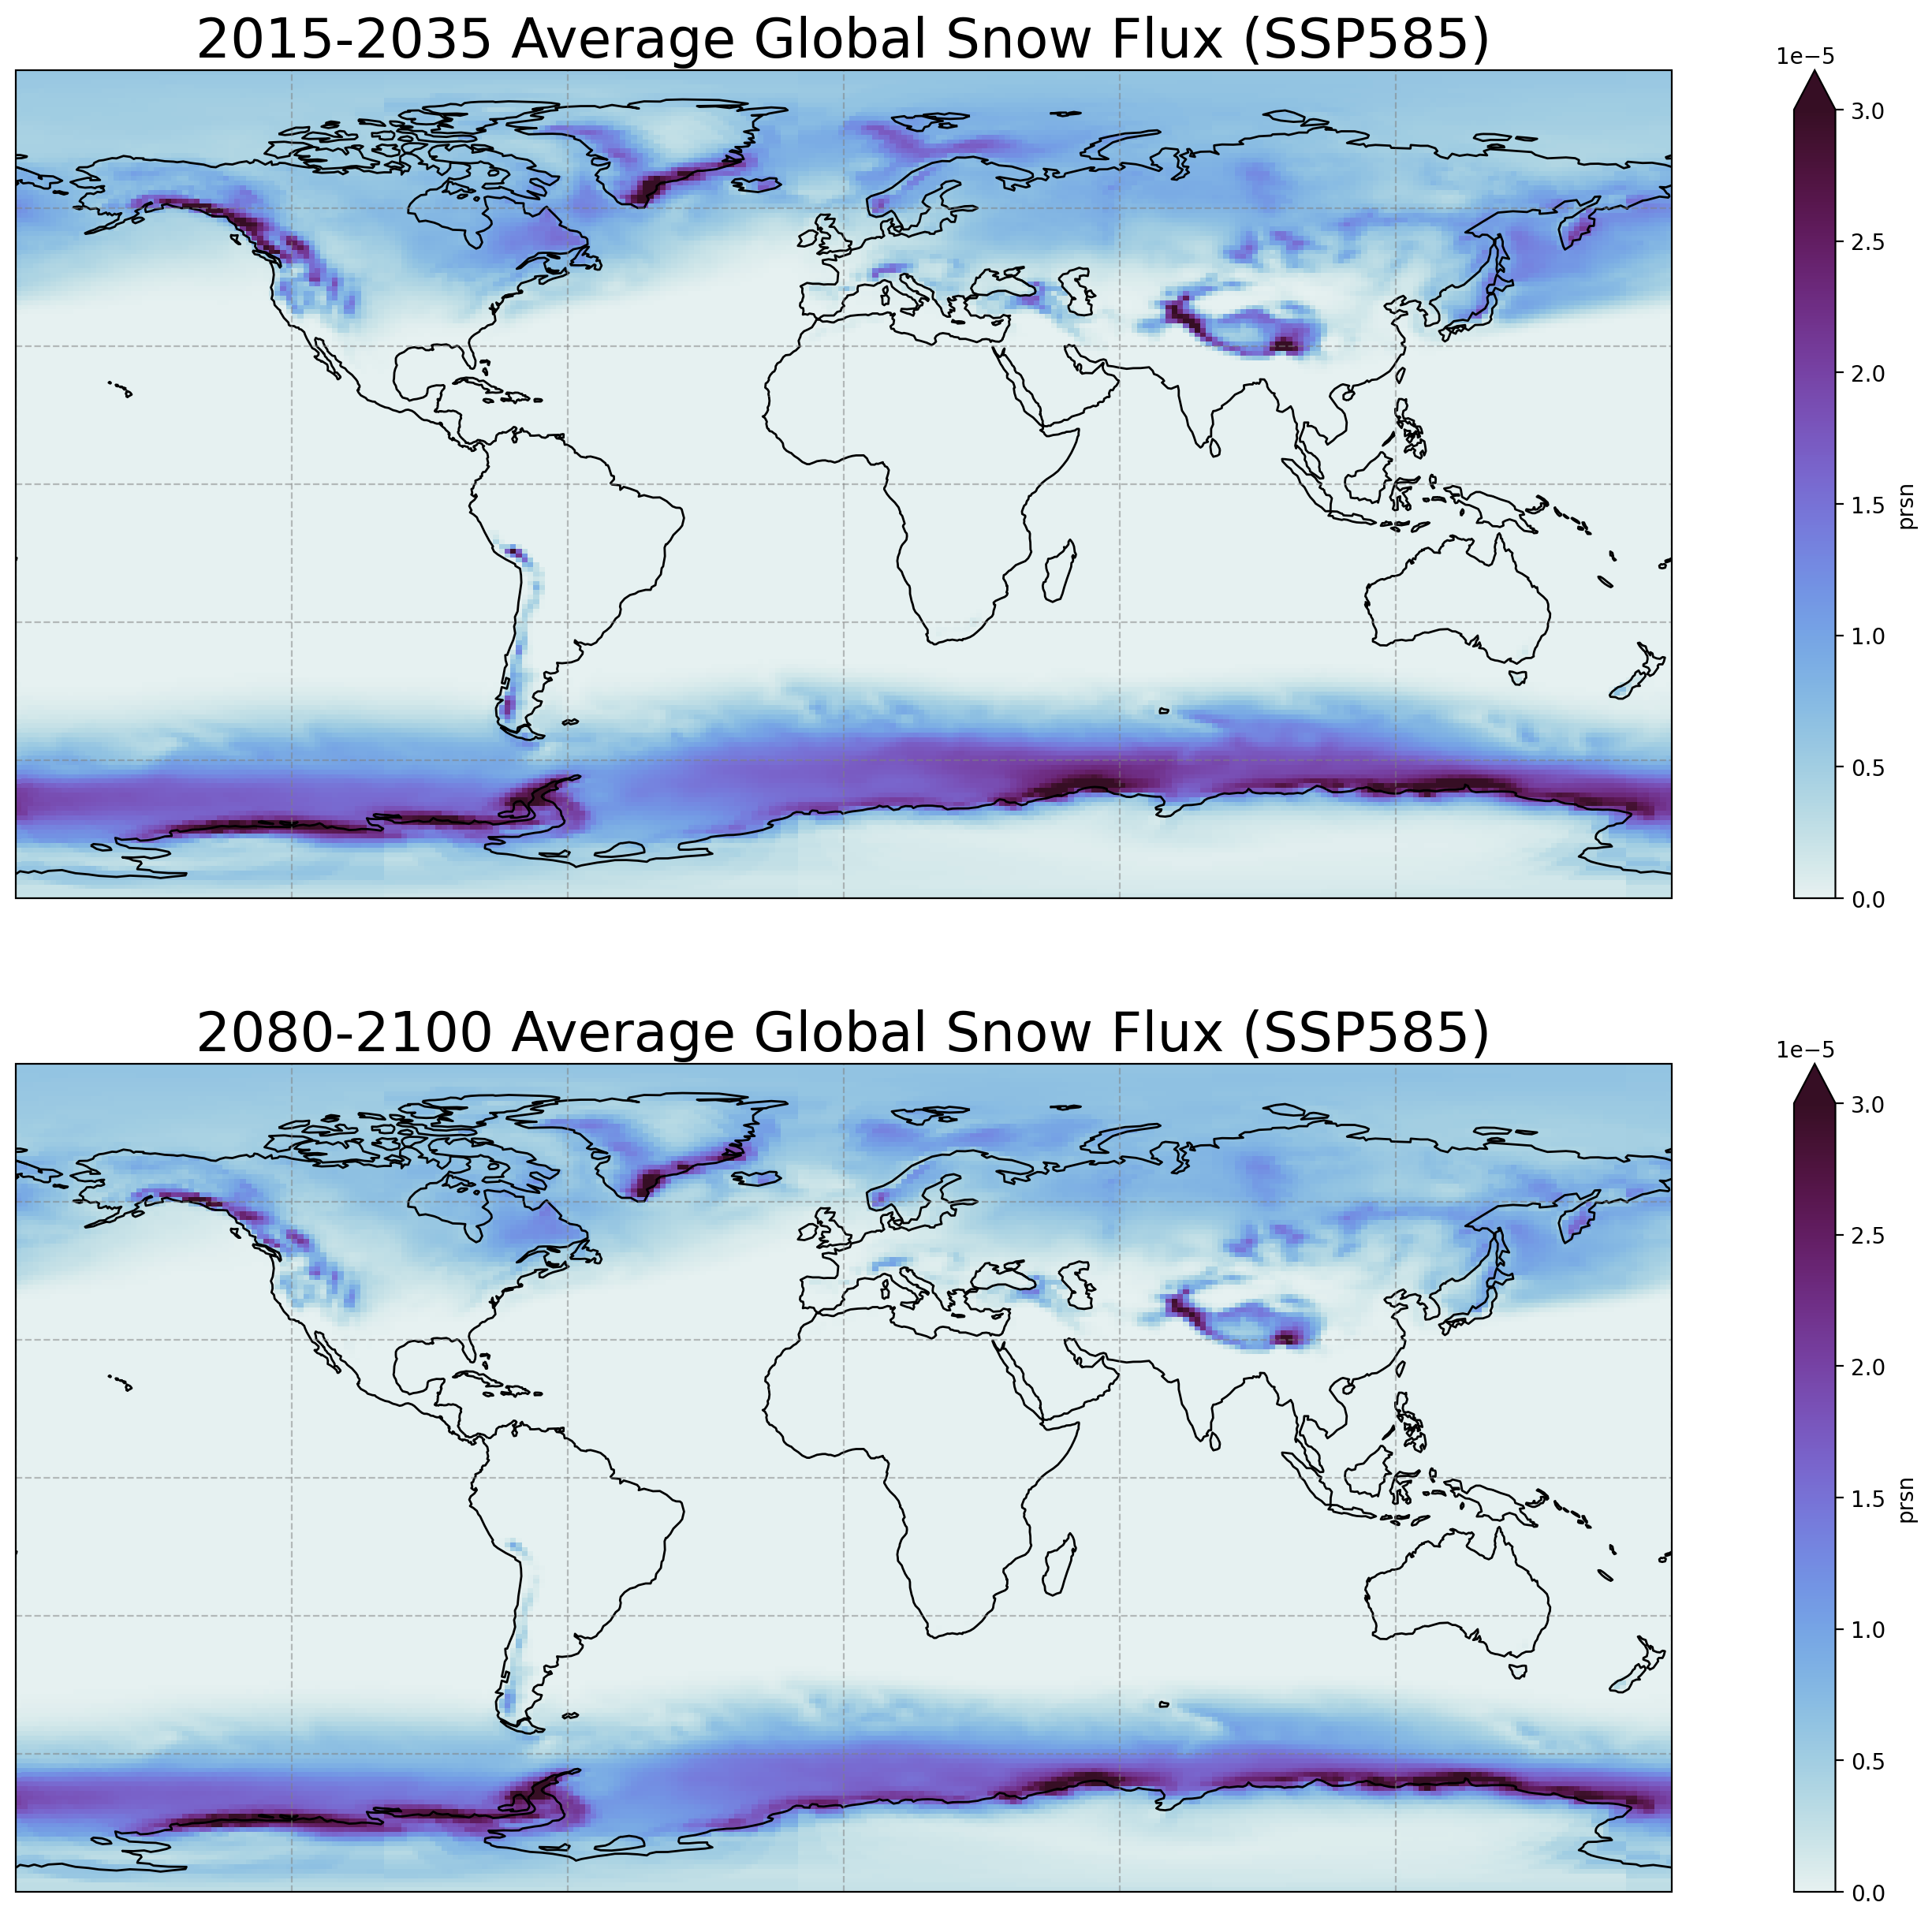

In [93]:
# Establishing figure parameters and ensuring coastlines can be added atop the maps
subplot_kws=dict(projection=ccrs.PlateCarree())
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15), subplot_kw = subplot_kws)

# Plotting each dataset on their perspective axis
firstavg_prs585.plot(ax = ax1, cmap = cmocean.cm.dense, vmin = 0, vmax = 0.00003, transform = ccrs.PlateCarree())
lastavg_prs585.plot(ax = ax2, cmap = cmocean.cm.dense, vmin = 0, vmax = 0.00003, transform = ccrs.PlateCarree())

#Setting figure titles
ax1.set_title('2015-2035 Average Global Snow Flux (SSP585)', fontsize = 25)
ax2.set_title('2080-2100 Average Global Snow Flux (SSP585)', fontsize = 25)

# Adding coastlines for better visualization
ax1.coastlines()
ax2.coastlines()

# Adding gridlines
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

**prs Anomalies**

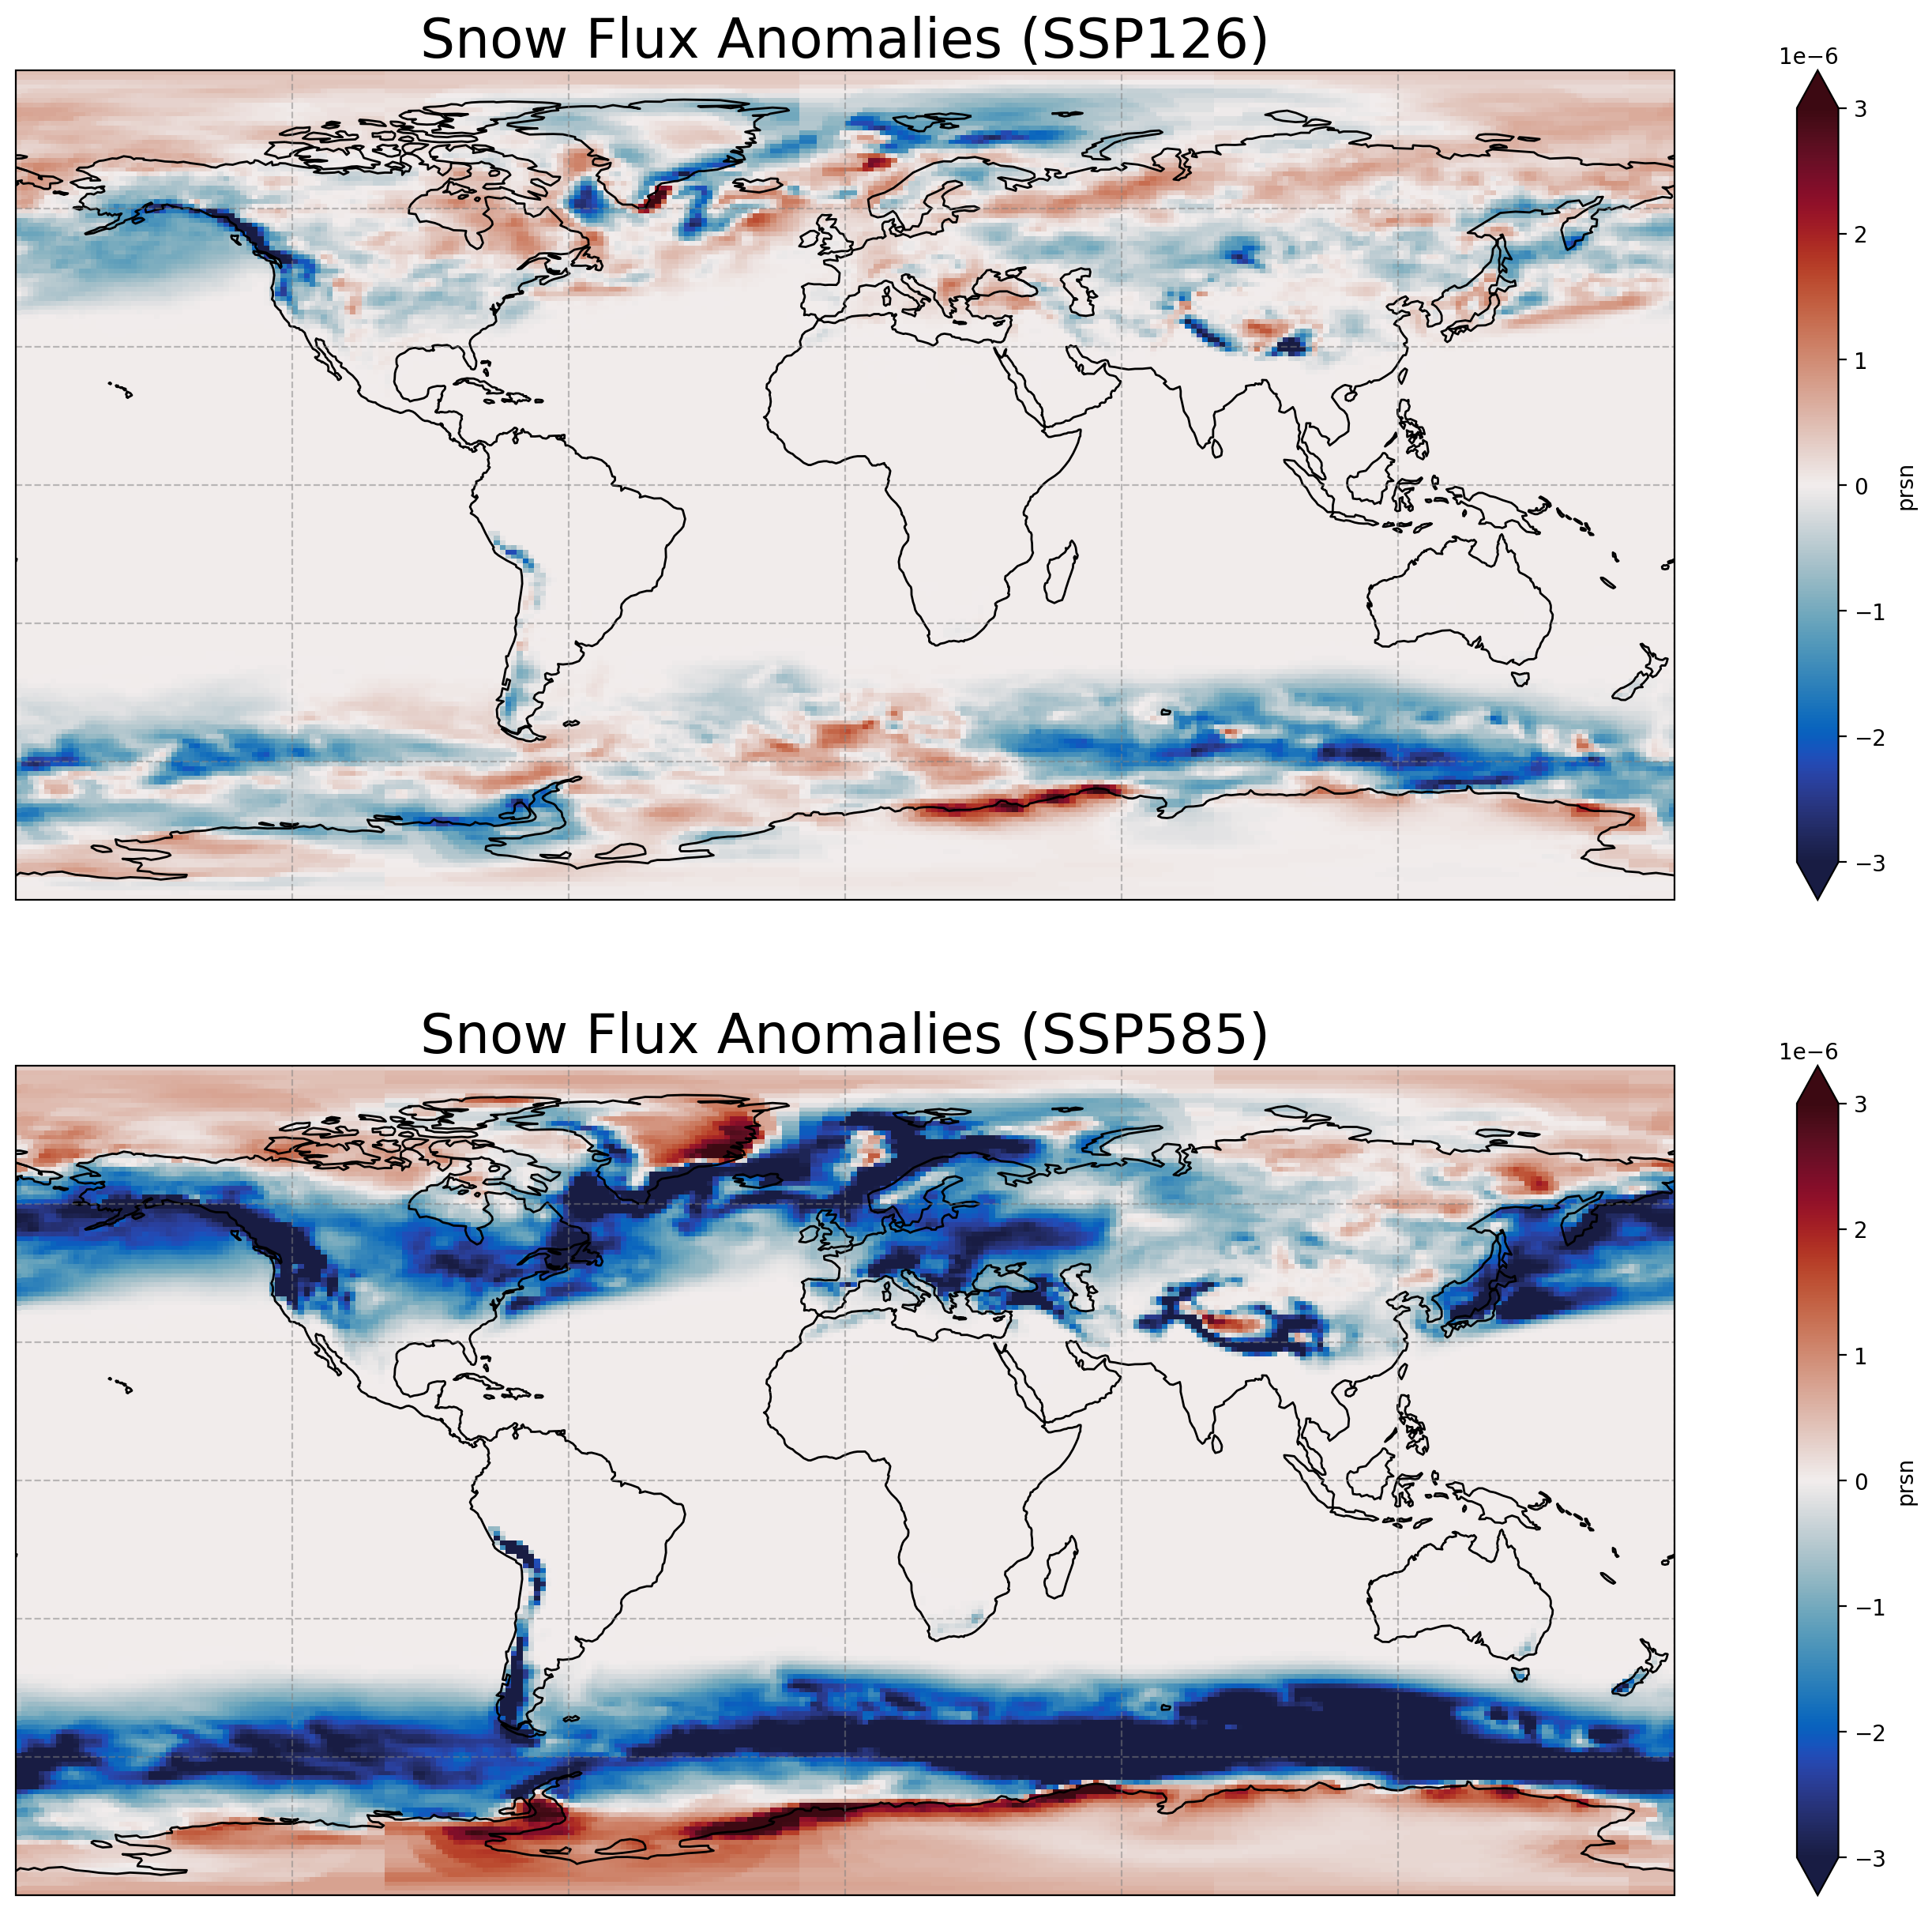

In [94]:
# Establishing figure parameters and ensuring coastlines can be added atop the maps
subplot_kws=dict(projection=ccrs.PlateCarree())
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15), subplot_kw = subplot_kws)

# Plotting each dataset on their perspective axis
prs126_anomaly.plot(ax = ax1, cmap = cmocean.cm.balance, vmin = -0.000003, vmax = 0.000003, transform = ccrs.PlateCarree())
prs585_anomaly.plot(ax = ax2, cmap = cmocean.cm.balance, vmin = -0.000003, vmax = 0.000003, transform = ccrs.PlateCarree())

#Setting figure titles
ax1.set_title('Snow Flux Anomalies (SSP126)', fontsize = 25)
ax2.set_title('Snow Flux Anomalies (SSP585)', fontsize = 25)

# Adding coastlines for better visualization
ax1.coastlines()
ax2.coastlines()

# Adding gridlines
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

In [127]:
weighted_prs126 = prs126*areacell_xarray
weighted_prs585 = prs585*areacell_xarray

In [128]:
mean_prs126 = weighted_prs126.sum(dim = ['latitude', 'longitude']).groupby('time.year').mean(dim = 'time')

mean_prs585 = weighted_prs585.sum(dim = ['latitude', 'longitude']).groupby('time.year').mean(dim = 'time')

Text(0.5, 0, 'Year')

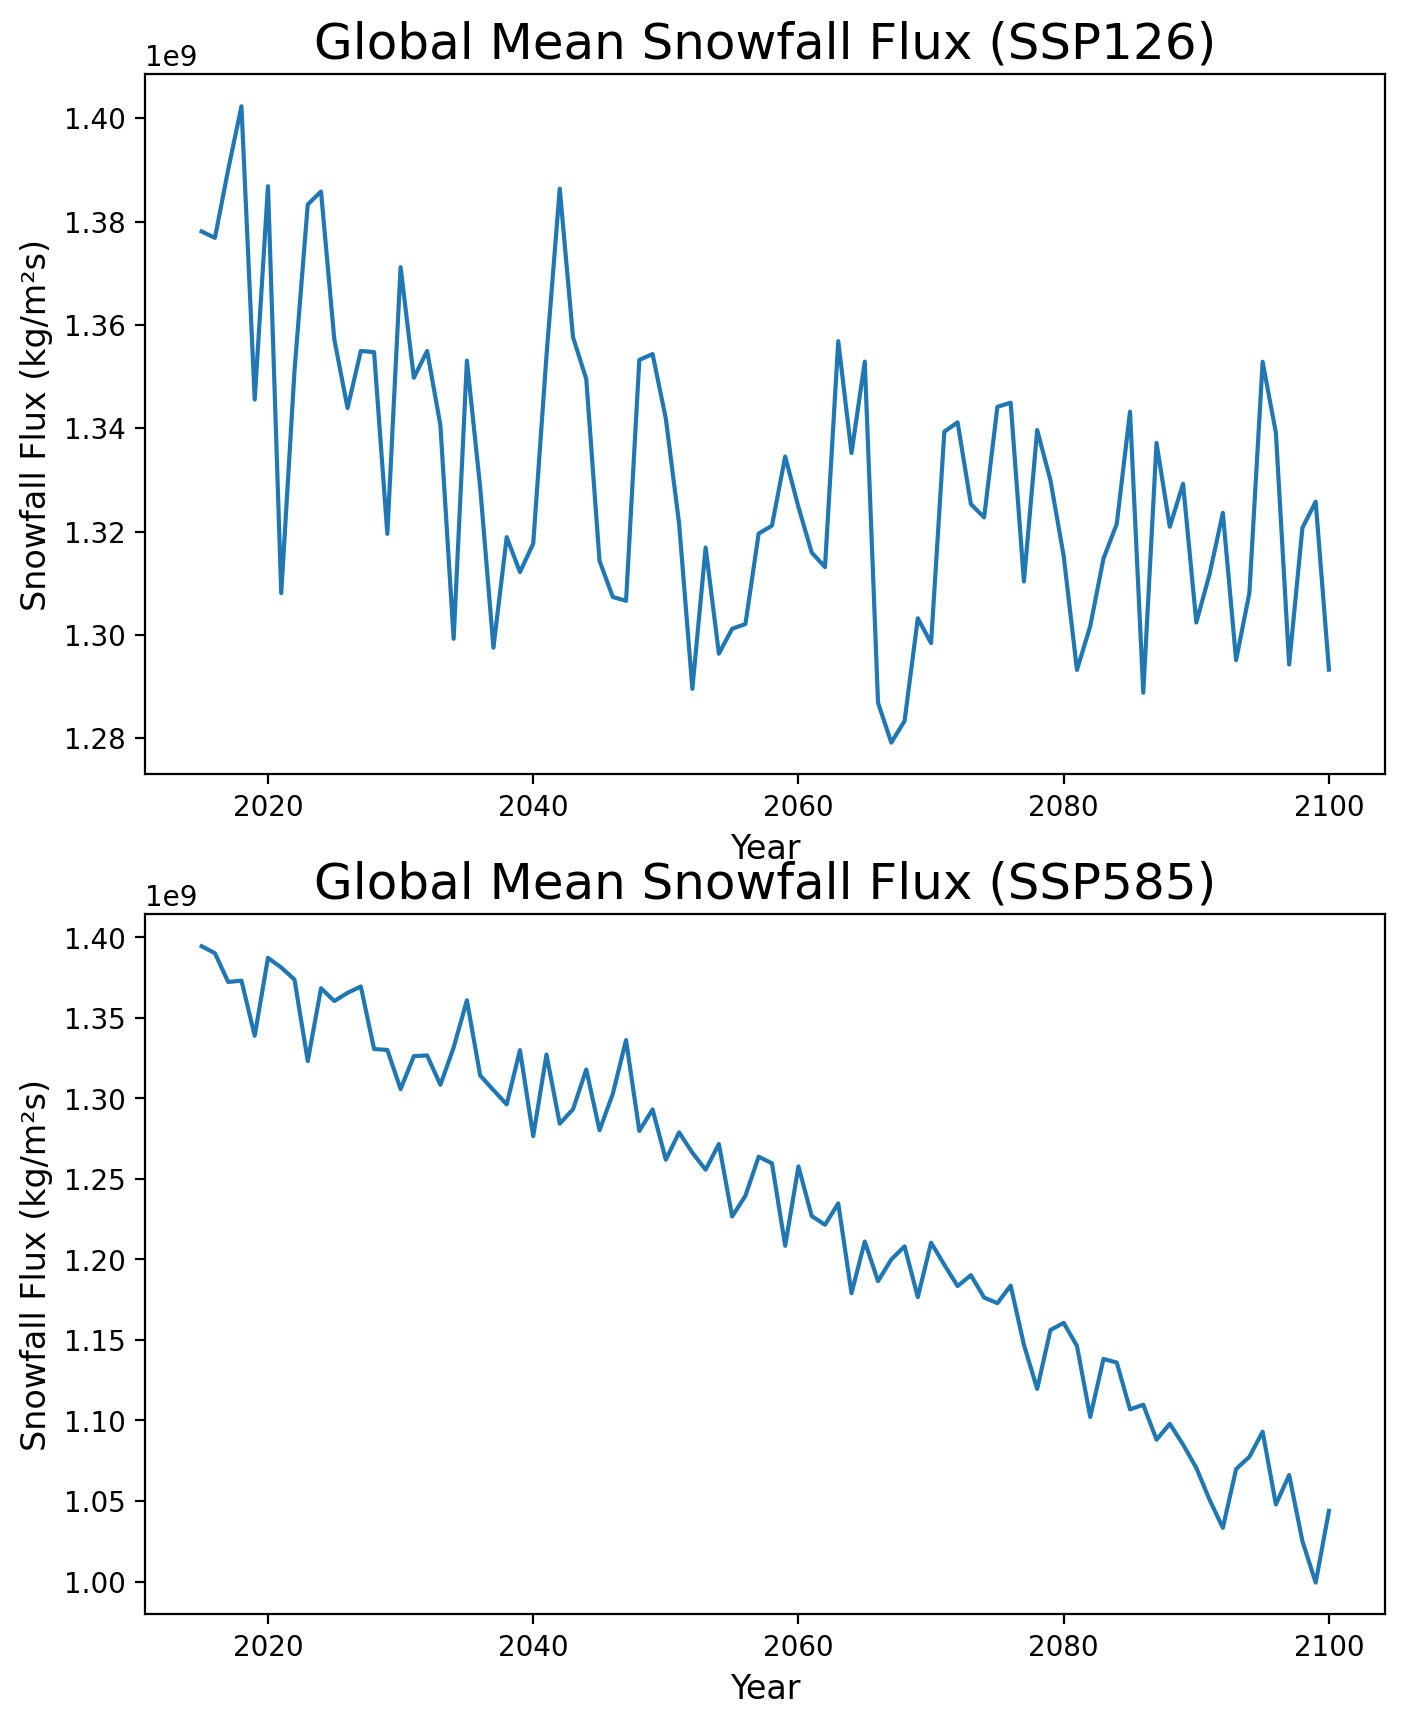

In [131]:
# Establishing figure parameters
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 10))

# Assigning each dataset to the appropriate axis
mean_prs126.plot(ax = ax1)
mean_prs585.plot(ax = ax2)

# Adding figure titles
ax1.set_title('Global Mean Snowfall Flux (SSP126)', fontsize = 18)
ax2.set_title('Global Mean Snowfall Flux (SSP585)', fontsize = 18)

# Adding axis titles
ax1.set_ylabel('Snowfall Flux (kg/m²s)', fontsize = 12)
ax2.set_ylabel('Snowfall Flux (kg/m²s)', fontsize = 12)

ax1.set_xlabel('Year', fontsize = 12)
ax2.set_xlabel('Year', fontsize = 12)